In [1]:
from tensorflow.python.keras.datasets import imdb

In [2]:
(x_train , y_train ),(x_test , y_test)= imdb.load_data(num_words=10000)

In [3]:
print(x_test[20]) #you can see that the words are in number....we have to change numbers to words fro OUR readality

[1, 14, 22, 16, 31, 15, 13, 28, 4465, 8, 67, 18, 49, 58, 13, 16, 1264, 8, 169, 12, 47, 77, 285, 6658, 4, 487, 7, 14, 22, 47, 77, 38, 8625, 2882, 5, 2, 230, 724, 51, 9, 110, 34, 4, 311, 13, 258, 12, 1139, 15, 38, 111, 84, 149, 80, 24, 332, 200, 49, 55, 674, 411, 21, 849, 48, 24, 4, 20, 80, 97, 281, 11, 6, 275, 96, 5, 9, 55, 530, 4, 22, 47, 111, 537, 5, 105, 9320, 295, 187, 14, 31, 109, 2, 6, 132, 937, 47, 2313, 39, 4, 1986, 6929, 111, 2, 5, 413, 6, 55, 976, 1676, 103, 3427, 49, 58, 11, 1172, 2, 659, 6, 2, 11, 4, 1351, 1510, 5, 143, 6, 1193, 471, 7, 687, 9, 626, 64, 8, 169, 285, 9, 24, 33, 32, 51, 12, 186, 2, 659, 309, 170, 56, 429, 4, 1931, 5513, 7, 926, 5, 993, 2, 11, 661, 8, 97, 788, 89, 674, 6, 1601, 681, 9, 5, 1407, 18, 6, 325, 778, 17, 4, 890, 9, 11, 2800, 429, 2, 7, 4008, 5, 3408, 671, 10, 10, 6, 1703, 56, 8, 6980, 5, 976, 701, 570, 1299, 5, 505, 14, 22, 80, 563, 25, 2, 13, 258, 4, 177, 7, 14, 20, 8, 30, 1339, 5, 9, 24, 6, 20, 8, 30, 3714, 321, 140, 851, 12, 639]


In [4]:
word_index = imdb.get_word_index()

In [5]:
print(word_index["hi"])

6593


In [6]:
print(word_index["print"])

2489


In [7]:
reverse = dict((key,value) for value, key in word_index.items())

In [8]:
#decoding the values
def decode_reviews(reviews):
    text=''
    for i in reviews:
        text += reverse[i]
        text+=' '
        
        
    return text

In [9]:
decode_reviews(x_train[1])

"the thought solid thought senator do making to is spot nomination assumed while he of jack in where picked as getting on was did hands fact characters to always life thrillers not as me can't in at are br of sure your way of little it strongly random to view of love it so principles of guy it used producer of where it of here icon film of outside to don't all unique some like of direction it if out her imagination below keep of queen he diverse to makes this stretch and of solid it thought begins br senator and budget worthwhile though ok and awaiting for ever better were and diverse for budget look kicked any to of making it out and follows for effects show to show cast this family us scenes more it severe making senator to and finds tv tend to of emerged these thing wants but and an beckinsale cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them "

In [10]:
# length of reviews are different in each review

print("1st x_train length:",len(x_train[0]))
print("2st x_train length:",len(x_train[1]))
print("1st x_test length:",len(x_test[0]))
print("2st x_test length:",len(x_test[1]))

#we can see that the lenths are diff. we have to equal the length of reviews 

1st x_train length: 218
2st x_train length: 189
1st x_test length: 68
2st x_test length: 260


In [11]:
# to equal all the length of reviews we have to use padding
# we will pad "the"
word_index["the"]



1

In [12]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, value =word_index["the"],padding ="post",maxlen =260)
x_test = pad_sequences(x_test, value =word_index["the"],padding ="post",maxlen =260)

In [13]:
#now all the reviews are of equal length
print("length of 1st x_train:" ,len(x_train[0]))
print("length of 1st x_test:" ,len(x_test[0]))

length of 1st x_train: 260
length of 1st x_test: 260


In [14]:
decode_reviews(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [15]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding , GlobalAveragePooling1D ,Dense


In [28]:
model = Sequential([
    Embedding(10000 ,16),
    GlobalAveragePooling1D(),
    Dense(16,activation = "relu"),
    Dense(1,activation="sigmoid")
])

model.compile(
      optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.python.keras.callbacks import LambdaCallback



In [31]:
log = LambdaCallback(on_epoch_end= lambda e,l: print(e, end ="."))

E =20
fi  = model.fit( x_train,y_train ,  validation_split=0.2 , epochs =E ,callbacks= [log] , verbose = False)


0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

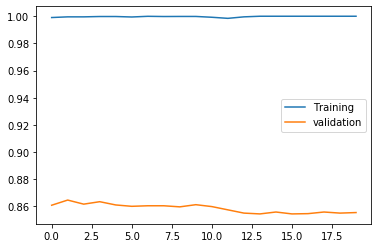

In [35]:
plt.plot(range(E),fi.history["acc"], label = "Training")
plt.plot(range(E),fi.history["val_acc"], label = "validation")
plt.legend()

In [37]:
loss , acc = model.evaluate(x_test,y_test)
print("test accuracy: ", acc*100)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test accuracy:  83.28800201416016


In [38]:
#prediction
import numpy as np

class_names=["Negative","Positive"]

pred = model.predict(np.expand_dims(x_test[0],axis =0 ))
print(class_names[np.argmax(pred)])

Negative


In [39]:
decode_reviews(x_test[0]) #it looks like a NEGATIVE review

"the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world and her an have faint beginning own as is sequence the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the

# DONE